In [63]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Importing the dataset
data = pd.read_csv(r'C:\Users\kousi\Downloads\eeg1.csv')


In [65]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [66]:
# Checking for Missing Data
print(data.isnull().sum())

# Handling Missing Data
data = data.fillna(data.mean())


# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64


C:\Users\kousi\AppData\Local\Temp\ipykernel_4972\1991073423.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


C:\Users\kousi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


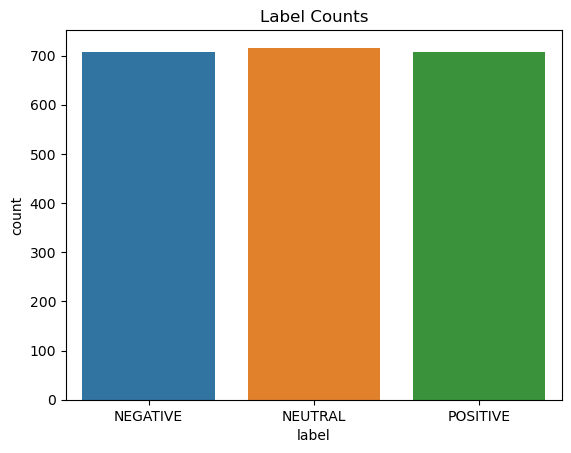

In [67]:
sns.countplot(data['label'])
plt.title('Label Counts')
plt.show()


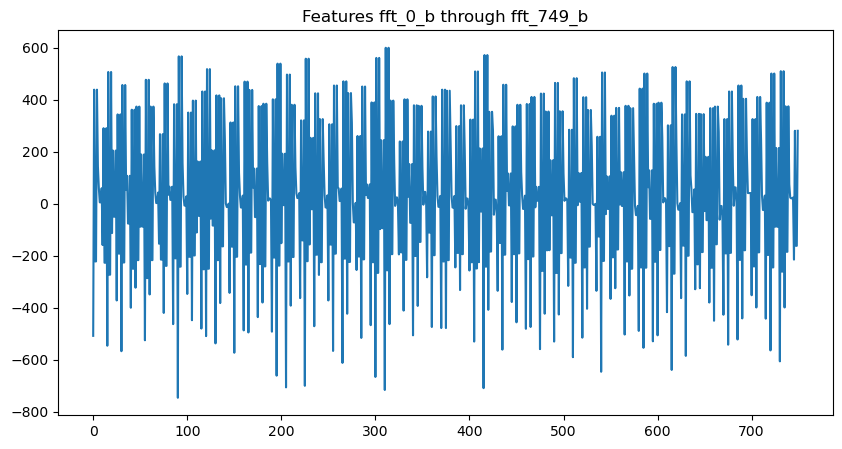

In [68]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(10,5))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [69]:
# Encoding Categorical Data
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [70]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,0
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,1
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,2
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,2
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,1


In [71]:
# Feature Scaling and Normalizing Data
scaler = StandardScaler()
X = data.drop('label', axis=1)
X = scaler.fit_transform(X)
y = data['label']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :5], data['label'], test_size=0.2, random_state=42)


In [73]:
# Initializing the models
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(random_state=42)
lr = LogisticRegression(random_state=42)


In [74]:
# Creating a dictionary of models
models = {'Random Forest': rfc, 'Decision Tree': dtc, 'KNN': knn, 'SVM': svc, 'Logistic Regression': lr}

In [75]:
# Training and Testing the models
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [76]:
# Evaluation of Models
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [77]:
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rfc * 100))
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dtc * 100))
print("KNN Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("SVM Accuracy: {:.2f}%".format(accuracy_svc * 100))
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))


Random Forest Accuracy: 97.42%
Decision Tree Accuracy: 94.85%
KNN Accuracy: 94.38%
SVM Accuracy: 90.87%
Logistic Regression Accuracy: 87.35%


In [78]:
from sklearn.metrics import classification_report

# Evaluation of Models
y_pred_rfc = rfc.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_lr = lr.predict(X_test)



C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [79]:
# Classification report
label = ['positive', 'negative', 'neutral']

print("Random Forest:")
print(classification_report(y_test, y_pred_rfc, target_names=label))


Random Forest:
              precision    recall  f1-score   support

    positive       0.98      0.97      0.97       143
    negative       1.00      0.98      0.99       148
     neutral       0.94      0.98      0.96       136

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



In [80]:
print("Decision Tree:")
print(classification_report(y_test, y_pred_dtc, target_names=label))


Decision Tree:
              precision    recall  f1-score   support

    positive       0.93      0.95      0.94       143
    negative       0.99      0.98      0.99       148
     neutral       0.93      0.91      0.92       136

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



In [81]:
print("KNN:")
print(classification_report(y_test, y_pred_knn, target_names=label))


KNN:
              precision    recall  f1-score   support

    positive       0.90      0.97      0.93       143
    negative       0.98      0.99      0.98       148
     neutral       0.95      0.88      0.91       136

    accuracy                           0.94       427
   macro avg       0.94      0.94      0.94       427
weighted avg       0.94      0.94      0.94       427



In [82]:
print("SVM:")
print(classification_report(y_test, y_pred_svc, target_names=label))


SVM:
              precision    recall  f1-score   support

    positive       0.83      0.99      0.90       143
    negative       0.97      0.96      0.97       148
     neutral       0.95      0.76      0.85       136

    accuracy                           0.91       427
   macro avg       0.92      0.91      0.91       427
weighted avg       0.92      0.91      0.91       427



In [83]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=label))

Logistic Regression:
              precision    recall  f1-score   support

    positive       0.85      0.84      0.85       143
    negative       0.95      0.97      0.96       148
     neutral       0.81      0.80      0.80       136

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.87       427
weighted avg       0.87      0.87      0.87       427



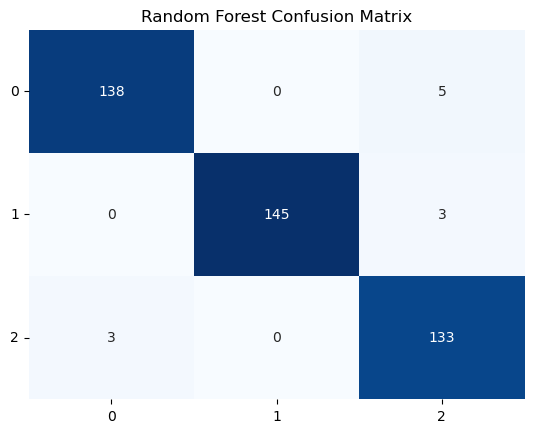

In [84]:
# Random Forest
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()




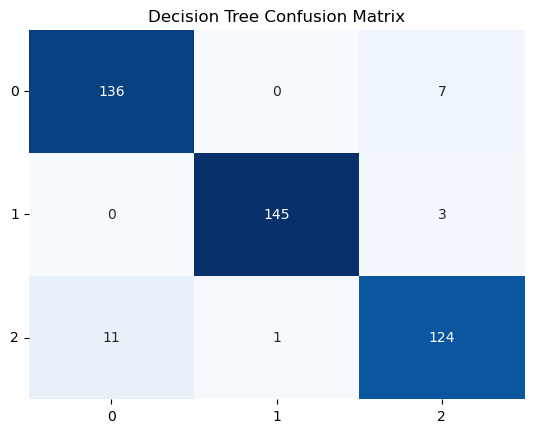

In [85]:
# Decision Tree
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()



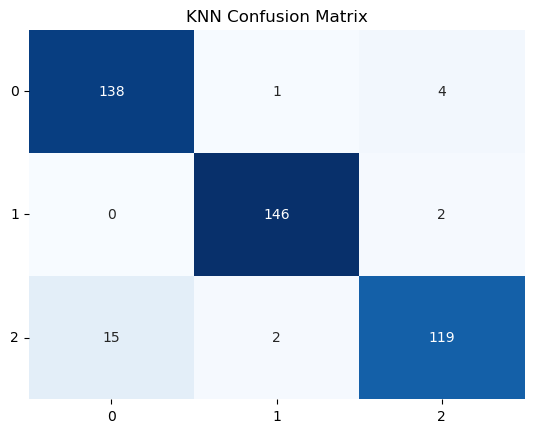

In [86]:
# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('KNN Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()



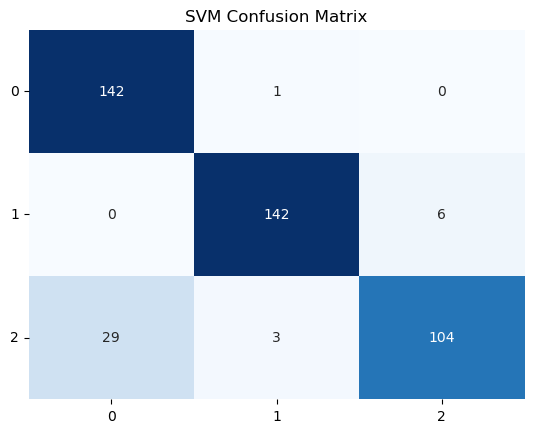

In [87]:
# SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('SVM Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()



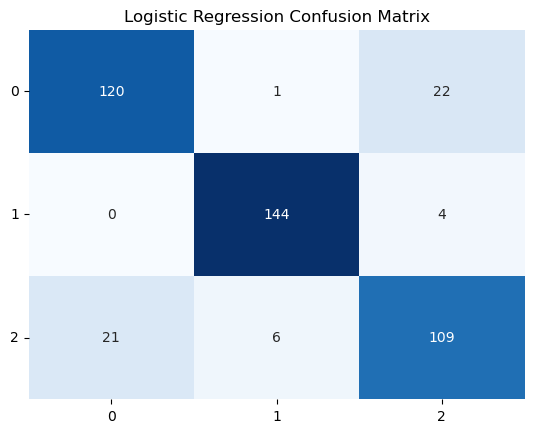

In [88]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()

In [89]:
print("----------------------")
print("------Random Forest------")

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train) 
rfy_pred = rf.predict(X_test)

print()
print("------Classification Report------")
print(classification_report(rfy_pred, y_test))

print()
print("------Accuracy------")
print("Random Forest Accuracy:", rf.score(X_test, y_test))
rfc = round(accuracy_score(rfy_pred, y_test) * 100)

----------------------
------Random Forest------

------Classification Report------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       141
           1       0.98      1.00      0.99       145
           2       0.98      0.94      0.96       141

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427


------Accuracy------
Random Forest Accuracy: 0.9742388758782201


In [90]:
print("----------------------")
print("------KNN------")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print()
print("------Classification Report------")
print(classification_report(knn_y_pred, y_test))

print()
print("------Accuracy------")
print("KNN Accuracy:", knn.score(X_test, y_test))
knn_acc = round(accuracy_score(knn_y_pred, y_test) * 100)


----------------------
------KNN------

------Classification Report------
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       153
           1       0.99      0.98      0.98       149
           2       0.88      0.95      0.91       125

    accuracy                           0.94       427
   macro avg       0.94      0.94      0.94       427
weighted avg       0.95      0.94      0.94       427


------Accuracy------
KNN Accuracy: 0.9437939110070258


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score




In [92]:
# Define the models
models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

# Perform cross-validation for each model
for model in models:
    scores = cross_val_score(model, X, y, cv=10)  # 10-fold cross-validation
    print(f"{type(model).__name__} Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression Accuracy: 0.96 (+/- 0.01)
DecisionTreeClassifier Accuracy: 0.96 (+/- 0.01)


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier Accuracy: 0.94 (+/- 0.01)
RandomForestClassifier Accuracy: 0.99 (+/- 0.01)


In [94]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

print("Confusion Matrix - Random Forest")
print(confusion_matrix(rfc_y_pred, y_test))


Confusion Matrix - Random Forest
[[138   0   3]
 [  0 145   0]
 [  5   3 133]]


In [95]:
print('Training accuracy:', rfc.score(X_train, y_train))
print('Testing accuracy:', rfc.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.9742388758782201


In [96]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

print("Confusion Matrix - Decision Tree")
print(confusion_matrix(dtc_y_pred, y_test))


Confusion Matrix - Decision Tree
[[136   0  11]
 [  0 145   1]
 [  7   3 124]]


In [97]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print("Confusion Matrix - K-Nearest Neighbors")
print(confusion_matrix(knn_y_pred, y_test))


Confusion Matrix - K-Nearest Neighbors
[[138   0  15]
 [  1 146   2]
 [  4   2 119]]


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [98]:
print('Training accuracy:', knn.score(X_train, y_train))
print('Testing accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9577712609970674
Testing accuracy: 0.9437939110070258


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [99]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

print("Confusion Matrix - Support Vector Machine")
print(confusion_matrix(svc_y_pred, y_test))


Confusion Matrix - Support Vector Machine
[[142   0  29]
 [  1 142   3]
 [  0   6 104]]


In [100]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix(lr_y_pred, y_test))


Confusion Matrix - Logistic Regression
[[120   0  21]
 [  1 144   6]
 [ 22   4 109]]


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
import pickle
from sklearn.ensemble import RandomForestClassifier

In [102]:


with open('rfc.pkl', 'wb') as file:
    pickle.dump(rfc, file)


In [104]:
# save the encoder object to a file
with open('encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# REGRESSION

In [105]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [106]:
# Model Building - Multiple Regression Algorithms
# create a dictionary of regression models
models = {
    'Linear Regression': linear_model.LinearRegression(),
    'Decision Tree': tree.DecisionTreeRegressor(),
    'Random Forest': ensemble.RandomForestRegressor(),
    'SVR': svm.SVR(),
    'XGBoost': xgboost.XGBRegressor()
}

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
from sklearn import metrics

# iterate over the models
for name, model in models.items():
    # fit the model on the training data
    model.fit(X_train, y_train)
    
    # make predictions on the test data
    y_pred = model.predict(X_test)
    
    # calculate and print the R-squared score for the model
    score = metrics.r2_score(y_test, y_pred)
    print(f"{name}: R-squared = {score:.4f}")


Linear Regression: R-squared = 0.3405
Decision Tree: R-squared = 0.7382
Random Forest: R-squared = 0.8653
SVR: R-squared = 0.5827
XGBoost: R-squared = 0.8485


In [109]:
# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression MSE: 0.43, R2: 0.34
Decision Tree MSE: 0.18, R2: 0.72
Random Forest MSE: 0.09, R2: 0.87
SVR MSE: 0.27, R2: 0.58
XGBoost MSE: 0.10, R2: 0.85


In [110]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {name}")
    print(f"Cross validation scores: {-scores}")
    print("-------------------------------------")

Model: Linear Regression
Cross validation scores: [0.44419241 0.42162452 0.42253597 0.46510681 0.41264068]
-------------------------------------
Model: Decision Tree
Cross validation scores: [0.19941349 0.15835777 0.15542522 0.11143695 0.16422287]
-------------------------------------
Model: Random Forest
Cross validation scores: [0.1117915  0.10284135 0.07247067 0.04744985 0.07259032]
-------------------------------------
Model: SVR
Cross validation scores: [0.32561247 0.29678699 0.34916034 0.30731641 0.2619235 ]
-------------------------------------
Model: XGBoost
Cross validation scores: [0.11938134 0.12921731 0.07611209 0.02841161 0.09581632]
-------------------------------------


In [111]:
from sklearn.ensemble import RandomForestRegressor

# assuming X_train and y_train are already defined

# create a random forest regressor model
rf_model = RandomForestRegressor()

# fit the model to the training data
rf_model.fit(X_train, y_train)

# get the feature importances
importances = rf_model.feature_importances_

# print the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")


# mean_0_a: 0.26600018192543345
mean_1_a: 0.10140879693818178
mean_2_a: 0.48250862219150287
mean_3_a: 0.051513905968920894
mean_4_a: 0.09856849297596099


# saving model

In [61]:
import pickle

In [122]:
with open('RandomForestRegressor.pkl', 'wb') as file:
    pickle.dump(rf, file)